In [1]:
import tensorflow as tf
import numpy as np
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [13]:
path="C:\CHANDRA KIRAN TEJA\projects\cat vs dog\training_set\training_set"
''' Data Augmentatioon'''
train_ds = ImageDataGenerator(rescale = 1./255, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

''' flow from directory '''
train_ds = train_ds.flow_from_directory('../training_set/..', target_size=(64, 64),batch_size=32, class_mode='binary')

Found 12797 images belonging to 6 classes.


In [15]:
''' Scaling '''
test_ds = ImageDataGenerator(rescale = 1./255)

''' flow from directory '''
test_ds = test_ds.flow_from_directory('../test_set/..', target_size=(64, 64), batch_size=32, 
                                      class_mode='binary')

Found 12797 images belonging to 6 classes.


In [16]:
''' container '''
model = tf.keras.models.Sequential()

In [17]:
''' addding layers to convtainer '''
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

In [18]:
''' adding max pool layer '''
model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [19]:
''' 2nd convolutional layer '''
model.add(tf.keras.layers.Conv2D(filters = 32,kernel_size = 3, activation = 'relu'))

''' 2nd max pool layer '''
model.add(tf.keras.layers.MaxPool2D(pool_size = 2, strides = 2))

In [20]:
''' flattening '''
model.add(tf.keras.layers.Flatten())

In [21]:
''' Hidden Layer '''
model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [22]:
''' classification layer '''
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [23]:
''' compile the model '''
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [24]:
''' training '''
model.fit(x=train_ds, validation_data=test_ds, epochs=25)

Epoch 1/25
400/400 [==============================] - 123s 304ms/step - loss: -69742497.5804 - accuracy: 0.0060 - val_loss: -2147159296.0000 - val_accuracy: 0.0063
Epoch 2/25
400/400 [==============================] - 80s 200ms/step - loss: -6966487892.2693 - accuracy: 0.0058 - val_loss: -39714242560.0000 - val_accuracy: 0.0063
Epoch 3/25
400/400 [==============================] - 85s 213ms/step - loss: -66729794399.1222 - accuracy: 0.0068 - val_loss: -190809128960.0000 - val_accuracy: 0.0063
Epoch 4/25
400/400 [==============================] - 78s 196ms/step - loss: -262046778038.5835 - accuracy: 0.0057 - val_loss: -553160409088.0000 - val_accuracy: 0.0063
Epoch 5/25
400/400 [==============================] - 80s 201ms/step - loss: -691234292161.4364 - accuracy: 0.0063 - val_loss: -1226929602560.0000 - val_accuracy: 0.0063
Epoch 6/25
400/400 [==============================] - 79s 198ms/step - loss: -1469062344142.2046 - accuracy: 0.0074 - val_loss: -2309594546176.0000 - val_accuracy:

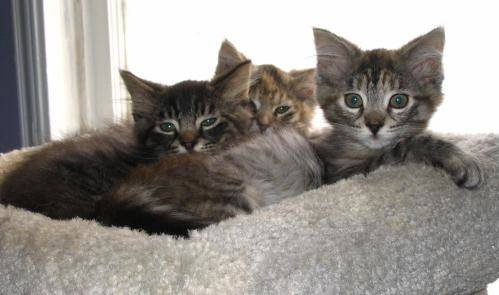

In [28]:
''' plotting cat image '''
image.load_img('training_set/cats/cat.1441.jpg')

In [40]:
''' prediction '''
test_img = image.load_img('training_set/cats/cat.1441.jpg', target_size = (64, 64))

''' converting image to array '''
img = image.img_to_array(test_img)

''' expanding dimension '''
img = np.expand_dims(img, axis=0)

''' prediction '''
r = model.predict(img)
train_ds.class_indices

if r[0][0] == 0:
    pred = 'dog'
else:
    pred = 'cat'

In [41]:
print(pred)

cat


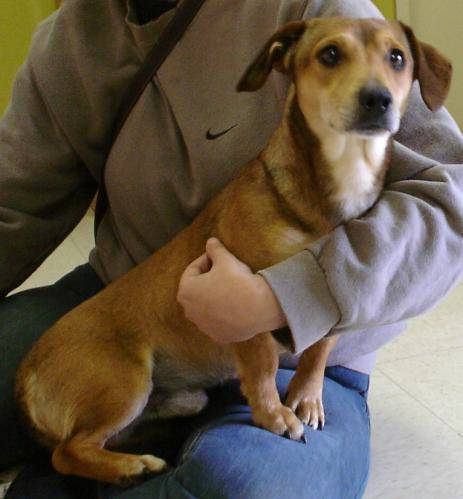

In [42]:
''' plotting dog image '''
image.load_img('training_set/dogs/dog.1280.jpg')

In [44]:
''' prediction '''
test_img = image.load_img('training_set/dogs/dog.1280.jpg', target_size = (64, 64))

''' converting image to array '''
img = image.img_to_array(test_img)

''' expanding dimension '''
img = np.expand_dims(img, axis = 0)

''' prediction '''
r = model.predict(img)

train_ds.class_indices

if r[0][0] == 1:
    pred = 'dog'
else:
    pred = 'cat'

In [45]:
print(pred)

dog
